In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNC
import matplotlib.pyplot as plt

In [2]:
#Importing dataset
iris = pd.read_csv("Datasets\iris.csv")

In [3]:
#Checking data
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#Unique classes in output variable
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
#Class count in output variable (it shows balance dataset)
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [6]:
#Splitting the data into train and test
train,test = train_test_split(iris,test_size = 0.3) 

In [7]:
# for 3 nearest neighbours 
neigh_3 = KNC(n_neighbors= 3)

In [8]:
# Fitting with training data 
x = train.iloc[:,0:4]
y = train.iloc[:,4]
neigh_3.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [9]:
neigh_3.score(x,y) #trining accuracy

0.9619047619047619

In [10]:
#Storing training prediction for cross tabulation
training_pred = neigh_3.predict(train.iloc[:,0:4])

In [11]:
#Storing testing prediction for cross tabulation
testing_pred = neigh_3.predict(test.iloc[:,0:4])

In [12]:
# test accuracy 
test_acc = np.mean(neigh_3.predict(test.iloc[:,0:4])==test.iloc[:,4]) # 100%
test_acc

0.9777777777777777

In [13]:
pd.crosstab(training_pred, train.species)

species,setosa,versicolor,virginica
row_0,,,
setosa,35,0,0
versicolor,0,30,2
virginica,0,3,35


In [14]:
pd.crosstab(testing_pred, test.species)

species,setosa,versicolor,virginica
row_0,,,
setosa,15,0,0
versicolor,0,17,1
virginica,0,0,12


In [11]:
# Preparing another model for 5 nearest neighbours
neigh_5 = KNC(n_neighbors=5)
neigh_5.fit(x,y)

KNeighborsClassifier()

In [12]:
neigh_5.score(x,y) #trining R2

0.9619047619047619

In [13]:
#Storing training prediction for cross tabulation
training_pred_5 = neigh_5.predict(train.iloc[:,0:4])

In [14]:
testing_pred_5 = neigh_5.predict(test.iloc[:,0:4])

In [15]:
# test accuracy
test_acc = np.mean(neigh_5.predict(test.iloc[:,0:4])==test.iloc[:,4]) # 100%
test_acc

0.9777777777777777

In [20]:
#print(train_acc,test_acc)

In [16]:
# creating empty list variable  to store accuracy for multiple model with for loop
acc = []

In [20]:
# running KNN algorithm for 3 to 30 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 
for i in range(3,30,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:4],train.iloc[:,4])
    train_score = neigh.score(x,y)
    test_score = np.mean(neigh.predict(test.iloc[:,0:4])==test.iloc[:,4]) 
    #train_acc = np.mean(neigh.predict(train.iloc[:,0:4])==train.iloc[:,4])
    #test_acc = np.mean(neigh.predict(test.iloc[:,0:4])==test.iloc[:,4])
    print(test_score)
    acc.append([train_score,test_score])

0.9555555555555556
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777
1.0


In [18]:
test_score

1.0

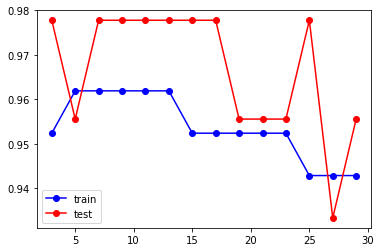

In [24]:
# train accuracy plot 
plt.plot(np.arange(3,30,2),[i[0] for i in acc],"bo-")


# test accuracy plot
plt.plot(np.arange(3,30,2),[i[1] for i in acc],"ro-")

plt.legend(["train","test"])

So, from above plot we have to finalize the optimal value for k and rebuild the final model for deployment